# 문제

1. 두 개 이상의 국내 상장사 주가, 또는 해외 주가 (지수 포함)를 선택하여 다운로드  받습니다.   (원자료를 제출할 필요 없습니다)
2. 해당 기업들의 시계열 자료(가격, 거래량, 변화율, 변화율 제곱)를 도해화  
   (plotting)하세요
$$변화율 = \big(\log P_t - \log P_{t-1}\big)$$    
3. 도해화한 자료의 특징을 기술하시오. 주요 주안점은
  - 가격은 어떤 특징을 갖고 있나요?
  - 변화율 제곱은 어떤 해석이 가능하며 어떤 특징을 갖고 있나요?
  - 거래량과 (가격 또는 변화율 또는 변화율 제곱)과 관계가 있나요?
4.기술적 분석 관련 지표(거래량, 변동성, 추세, 모멘텀 등)를 8개 이상 선택하여 도해화 하세요
   - 공유폴더의 myTA.py를 활용해도 되고, chatGPT를 통해 선택해도 무방합니다.
5. Random forest를 활용하여 feature importance를 계산하고, 어떤 피쳐가 중요한지 기술하시오.
   - 예측 기간은 본인이 설정하되, 5일 또는 20일, 60일 정도 선택해서 분석하길 추천합니다.

6. PCA(0.95)를 통해 분석하는 경우, 몇 개의 components가 나오나요?
  6-1: 해당 component에서 가장 설명력이 높은 한 개의 component를 선택해서    
  원공간(original space, 즉 $\mathtt{inverse_transform(X)}$)으로     
  투영할 때 어떤 feature와 상관관계가 가장 높은 가요?

  6-2 (보너스): PCA components(95% 이상)를 원공간으로 보내서 random forest를 분석하고, feature importance가 가장 높은 component와 상관관계가 높은 원자료는 무엇인가요?


# 두 개 이상의 국내 상장사 주가, 또는 해외 주가(지수 포함)을 선택하여 다운로드 받는다.

In [ ]:
!pip install pykrx
import pykrx as pykrx
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 28.3 MB/s eta 0:00:00


In [ ]:
def get_stock_data_pykrx(ticker, start_date, end_date):
  data = pykrx.stock.get_market_ohlcv(start_date,end_date,ticker)
  return data

In [ ]:
# Get KOSDAQ150 List
pdfKosdaq150 = stock.get_index_portfolio_deposit_file("2203") # KOSDAQ150
print(len(pdfKosdaq150), pdfKosdaq150)

150 ['247540', '086520', '091990', '022100', '066970', '035900', '028300', '263750', '403870', '196170', '041510', '068760', '277810', '058470', '214150', '293490', '039030', '357780', '145020', '005290', '240810', '095340', '000250', '086900', '048410', '393890', '214370', '121600', '253450', '025900', '067310', '034230', '036930', '112040', '237690', '195940', '222800', '137400', '214450', '365340', '140410', '035760', '213420', '078600', '372170', '056190', '096530', '278280', '140860', '122870', '064760', '225570', '166090', '101490', '084370', '009520', '141080', '016790', '067630', '383310', '085660', '348370', '091120', '067160', '064550', '287410', '036540', '376300', '281740', '098460', '131970', '003380', '298380', '189300', '215200', '039200', '036830', '222080', '086450', '015750', '033290', '294090', '074600', '053800', '025980', '290650', '178320', '046890', '348210', '215000', '272290', '319660', '082270', '078340', '052020', '084850', '183300', '095500', '091700', '0682

In [ ]:
import time
start_date = '2011-01-01'
end_date = '2023-10-01'

dataList=[]
endIndex = 10 # 상위 몇개..

for i, curTicker in enumerate(pdfKosdaq150):
  if (i==endIndex): break
  curData = get_stock_data_pykrx(curTicker, start_date, end_date)
  print(i)
  time.sleep(1)
  dataList.append(curData)

0
1
2
3
4
5
6
7
8
9


# 해당 기업들의 시계열 자료(가격, 거래량, 변화율, 변화율 제곱)를 도해화(plotting)

In [ ]:
def getDiffColumn(data):
  data['diff'] = data['종가'].pct_change()
  data['volatility'] = data['diff']**2 #
  return data

In [ ]:
for i in range(len(dataList)):
  dataList[i] = getDiffColumn(dataList[i])

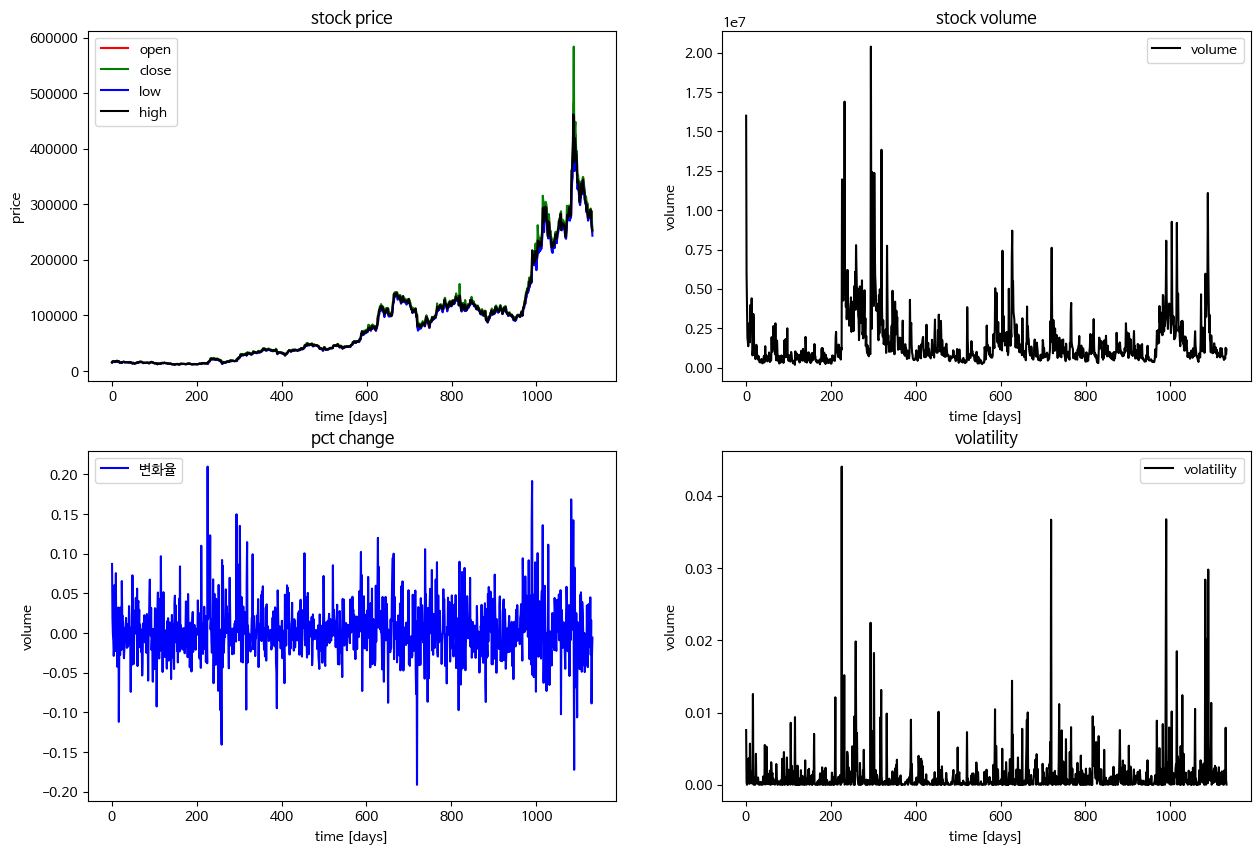

In [ ]:
plt.figure(figsize=(15, 10));
plt.subplot(2,2,1);
plt.plot(dataList[0]['시가'].values, color='red', label='open')
plt.plot(dataList[0]['고가'].values, color='green', label='close')
plt.plot(dataList[0]['저가'].values, color='blue', label='low')
plt.plot(dataList[0]['종가'].values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

plt.subplot(2,2,2);
plt.plot(dataList[0]['거래량'].values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

plt.subplot(2,2,3);
plt.plot(dataList[0]['diff'].values, color='blue', label='변화율')
plt.title('pct change')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

plt.subplot(2,2,4);
plt.plot(dataList[0]['volatility'].values, color='black', label='volatility')
plt.title('volatility')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

Text(0.5, 1.0, 'Overall')

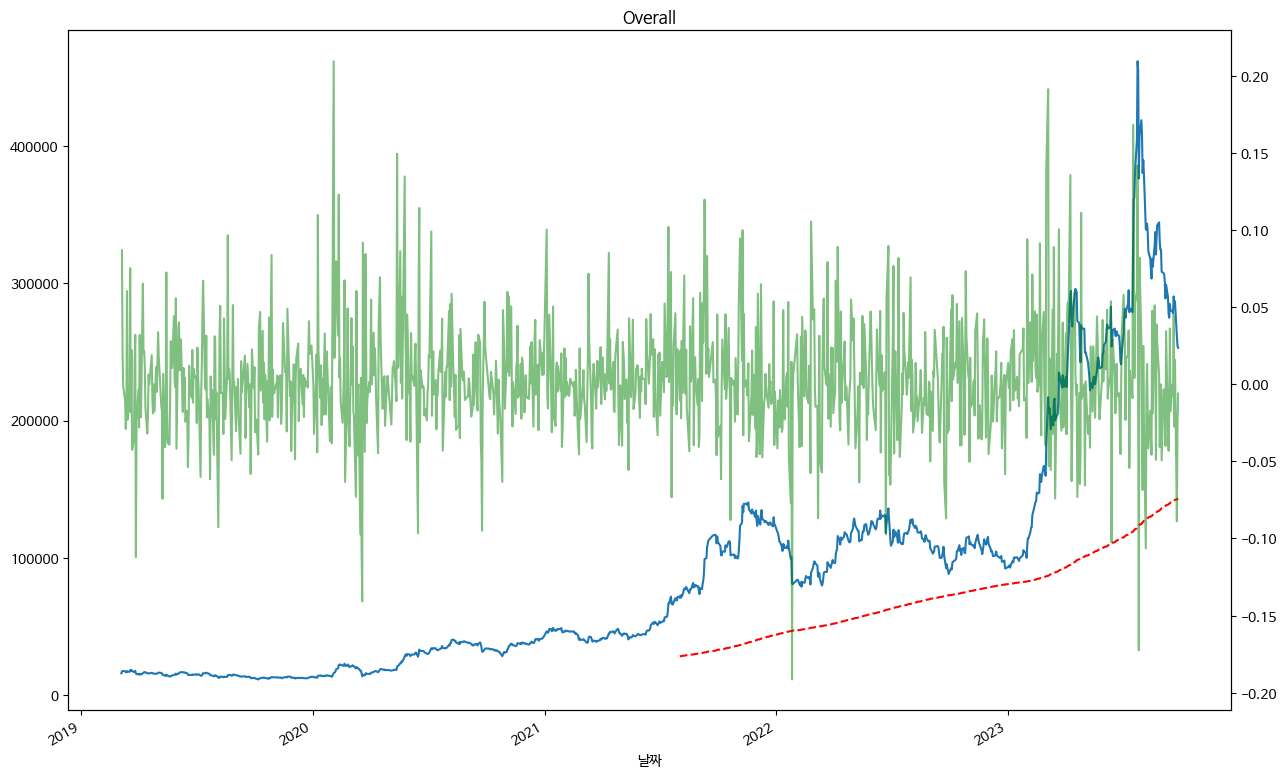

In [ ]:
plt.figure(figsize=(15,10))
ax=dataList[0]['종가'].plot()
dataList[0]['종가'].rolling(600).mean().plot(ax=ax, c='r', ls="--")
ax2 = ax.twinx()
dataList[0]['종가'].pct_change().dropna().plot(ax=ax2, c='g', alpha=0.5)
plt.title("Overall")

# 도해화한 자료의 특징을 기술하시오. 주요 주안점은
  - 가격은 어떤 특징을 갖고 있나요?
  > 우상향
  - 변화율 제곱은 어떤 해석이 가능하며 어떤 특징을 갖고 있나요?
  > 변화율 제곱이 커질 경우 같은 기간 거래량도 영향을 받는 것으로 보입니다.
  - 거래량과 (가격 또는 변화율 또는 변화율 제곱)과 관계가 있나요?
  > 있는 것으로 보입니다.

# 기술적 분석 관련 지표(거래량, 변동성, 추세, 모멘텀 등)를 8개 이상 선택하여 도해화 하세요
   - 공유폴더의 myTA.py를 활용해도 되고, chatGPT를 통해

In [ ]:
def addTechnicalIndex(df):
  df['SMA_5'] = df['종가'].rolling(window=5).mean()
  df['SMA_10'] = df['종가'].rolling(window=10).mean()
  df['SMA_20'] = df['종가'].rolling(window=20).mean()

  # RSI 추가 (예: 14일 기간)
  delta = df['종가'].diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)
  avg_gain = gain.rolling(window=14).mean()
  avg_loss = loss.rolling(window=14).mean()
  rs = avg_gain / avg_loss
  df['RSI'] = 100 - (100 / (1 + rs))

  # 스토캐스틱 오실레이터 추가 (예: 14일 기간)
  low_14 = df['저가'].rolling(window=14).min()
  high_14 = df['고가'].rolling(window=14).max()
  k = 100 * (df['종가'] - low_14) / (high_14 - low_14)
  d = k.rolling(window=3).mean()
  df['Stochastic_K'] = k
  df['Stochastic_D'] = d

  # 볼린저 밴드 추가 (예: 20일 기간, 2 표준편차)
  df['Bollinger_Middle'] = df['종가'].rolling(window=20).mean()
  df['Bollinger_Upper'] = df['Bollinger_Middle'] + 2 * df['종가'].rolling(window=20).std()
  df['Bollinger_Lower'] = df['Bollinger_Middle'] - 2 * df['종가'].rolling(window=20).std()
  return df

In [ ]:
for i in range(len(dataList)):
  dataList[i] = addTechnicalIndex(dataList[i])

# Random forest를 활용하여 feature importance를 계산하고, 어떤 피쳐가 중요한지 기술하시오.
   - 예측 기간은 본인이 설정하되, 5일 또는 20일, 60일 정도 선택해서 분석하길 추천합니다.

In [ ]:
def generate_features2(df_original):
    """ Generate features for a stock/index based on historical price and performance
    Args:
        df (dataframe with columns "Open", "Close", "High", "Low", "Volume", "Adjusted Close")
    Returns:
        dataframe, data set with new features
    """
    df_new = pd.DataFrame()
    df = df_original.copy()

    # Adaptor
    df['Close'] = df['종가']
    df['Volume'] = df['거래량']
    # the target
    df_new['Close'] = df['Close']


    # basics: return
    df_new['Ret'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    return_5 = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    return_30 = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    return_365 = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['Ret'].rolling(5).mean()
    df_new['moving_avg_20'] = df_new['Ret'].rolling(20).mean()
    df_new['moving_avg_240'] = df_new['Ret'].rolling(252).mean()


    # average price
    avg_price_5  = df['Close'].rolling(5).mean().shift(1)
    avg_price_30 = df['Close'].rolling(21).mean().shift(1)
    avg_price_365= df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = avg_price_5 / avg_price_30
    df_new['ratio_avg_price_5_365'] = avg_price_5 / avg_price_365
    df_new['ratio_avg_price_30_365'] = avg_price_30 / avg_price_365

    # average volume
    avg_volume_5 = df['Volume'].rolling(5).mean().shift(1)
    avg_volume_30 = df['Volume'].rolling(21).mean().shift(1)
    avg_volume_365 = df['Volume'].rolling(252).mean().shift(1)
    ratio_avg_volume_5_30 = avg_volume_5 / avg_volume_30
    ratio_avg_volume_5_365 = avg_volume_5 / avg_volume_365
    ratio_avg_volume_30_365 = avg_volume_30 / avg_volume_365

    # standard deviation of prices
    std_price_5 = df['Close'].rolling(5).std().shift(1)
    std_price_30 = df['Close'].rolling(21).std().shift(1)
    std_price_365 = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = std_price_5 / std_price_30
    df_new['ratio_std_price_5_365'] = std_price_5 / std_price_365
    df_new['ratio_std_price_30_365'] = std_price_30 / std_price_365

    # standard deviation of volumes
    std_volume_5 = df['Volume'].rolling(5).std().shift(1)
    std_volume_30 = df['Volume'].rolling(21).std().shift(1)
    std_volume_365 = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = std_volume_5 / std_volume_30
    df_new['ratio_std_volume_5_365'] = std_volume_5 / std_volume_365
    df_new['ratio_std_volume_30_365'] = std_volume_30 / std_volume_365


    # RSI 추가 (예: 14일 기간)
    delta = df['종가'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df_new['RSI'] = 100 - (100 / (1 + rs))

    # 스토캐스틱 오실레이터 추가 (예: 14일 기간)
    low_14 = df['저가'].rolling(window=14).min()
    high_14 = df['고가'].rolling(window=14).max()
    k = 100 * (df['종가'] - low_14) / (high_14 - low_14)
    d = k.rolling(window=3).mean()
    df_new['Stochastic_K'] = k
    df_new['Stochastic_D'] = d

    # 볼린저 밴드 추가 (예: 20일 기간, 2 표준편차)
    df_new['Bollinger_Middle'] = df['종가'].rolling(window=20).mean()
    df_new['Bollinger_Upper'] = df_new['Bollinger_Middle'] + 2 * df['종가'].rolling(window=20).std()
    df_new['Bollinger_Lower'] = df_new['Bollinger_Middle'] - 2 * df['종가'].rolling(window=20).std()
    df_new['diff'] = df['종가'].pct_change()
    df_new['volatility'] = df_new['diff']**2 #


    df_new = df_new.dropna(axis=0)
    return df_new

In [ ]:
for i in range(len(dataList)):
  dataList[i] = generate_features2(dataList[i])

In [ ]:
y=[]
for i in range(len(dataList)):
  y.append(np.sign(dataList[i]['Ret']))


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(dataList[0].drop(columns=['Ret']), y[0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, criterion = 'entropy')

param_dist_rf = {
 'n_estimators':[10, 20, 30, 50, 100, 200, 300, 400],
 'max_leaf_nodes':[20, 30, 40, 50],
 'max_features':[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
}

rnd_search = RandomizedSearchCV(rnd_clf, param_dist_rf, cv=10, random_state=42)
rnd_search.fit(Xtrain, ytrain)
print(rnd_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


{'n_estimators': 400, 'max_leaf_nodes': 20, 'max_features': 4}


In [ ]:
from sklearn.model_selection import cross_val_score

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, max_features=6, n_jobs=-1, random_state=42) #디폴트
rnd_scores = cross_val_score(rnd_clf, Xtrain, ytrain, scoring="accuracy", cv=10)
print("\n<10-fold cross-validation>")
print("accuracy score mean: ", rnd_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



<10-fold cross-validation>
accuracy score mean:  0.646969696969697


In [ ]:
rnd_clf.fit(Xtrain, ytrain)
print("\n<AI model: machine learning done >")
print("accuracy_score of train data(0.8 of sample): ", rnd_clf.score(Xtrain, ytrain))


<AI model: machine learning done >
accuracy_score of train data(0.8 of sample):  0.7984848484848485


In [ ]:
print("accuracy_score of test data(0.2 of sample): ", rnd_clf.score(Xtest, ytest))

accuracy_score of test data(0.2 of sample):  0.6409090909090909


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

<ipython-input-63-3973261cc9a1>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):


In [ ]:
from sklearn.metrics import confusion_matrix
ytest_pred = rnd_clf.predict(Xtest)
cm1= confusion_matrix(ytest, ytest_pred, labels=[-1,1])
print(cm1)

[[60 42]
 [32 81]]


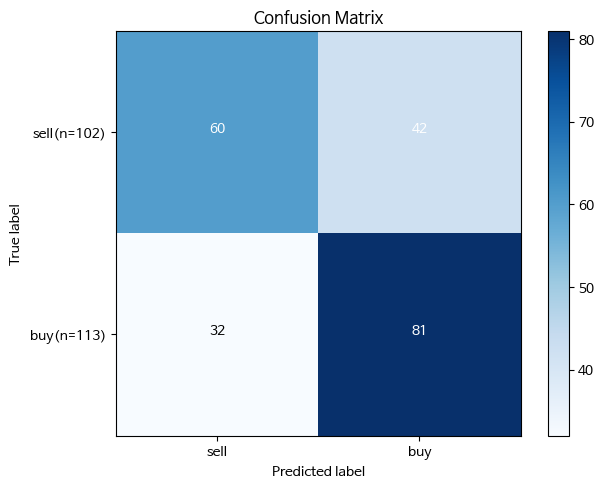

In [ ]:
plot_confusion_matrix(cm1, labels=["sell","buy"], normalize=False)

In [ ]:
print("\n<Feature importance>")
for name, score in zip(Xtrain.columns, rnd_clf.feature_importances_):
  print(name, ": ", score)


<Feature importance>
Close :  0.019076485311704947
moving_avg_5 :  0.20546749212246637
moving_avg_20 :  0.0375627022860988
moving_avg_240 :  0.026938953008353445
ratio_avg_price_5_30 :  0.053993027077229784
ratio_avg_price_5_365 :  0.02804531979894464
ratio_avg_price_30_365 :  0.028067034003911244
ratio_std_price_5_30 :  0.04155527302958678
ratio_std_price_5_365 :  0.029333018998094075
ratio_std_price_30_365 :  0.03237306190607629
ratio_std_volume_5_30 :  0.03287833955460981
ratio_std_volume_5_365 :  0.03199902887125795
ratio_std_volume_30_365 :  0.02420142347837857
RSI :  0.0606869799952028
Stochastic_K :  0.1372163233046623
Stochastic_D :  0.07942605369007147
Bollinger_Middle :  0.0185356230071038
Bollinger_Upper :  0.021365323694609556
Bollinger_Lower :  0.021941502650351868
diff :  0.03986016172798582
volatility :  0.029476872483299704


In [ ]:
# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(rnd_clf.feature_importances_, index=Xtrain.columns)

# 내림차순 정렬을 이용한다
top20 = ser.sort_values(ascending=False)[:20]
print(top20)

moving_avg_5               0.205467
Stochastic_K               0.137216
Stochastic_D               0.079426
RSI                        0.060687
ratio_avg_price_5_30       0.053993
ratio_std_price_5_30       0.041555
diff                       0.039860
moving_avg_20              0.037563
ratio_std_volume_5_30      0.032878
ratio_std_price_30_365     0.032373
ratio_std_volume_5_365     0.031999
volatility                 0.029477
ratio_std_price_5_365      0.029333
ratio_avg_price_30_365     0.028067
ratio_avg_price_5_365      0.028045
moving_avg_240             0.026939
ratio_std_volume_30_365    0.024201
Bollinger_Lower            0.021942
Bollinger_Upper            0.021365
Close                      0.019076
dtype: float64


<Axes: title={'center': 'Feature Importance(MDI) [%]'}>

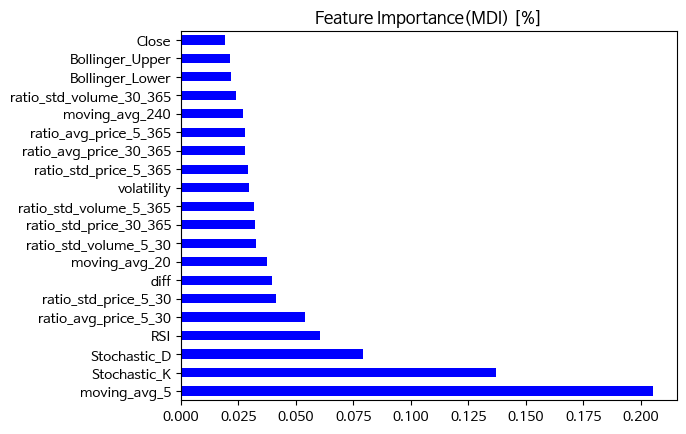

In [ ]:
pd.Series(top20).plot(kind='barh',color='blue',title='Feature Importance(MDI) [%]')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(dataList[0])

In [ ]:
pca.explained_variance_.sort()

In [ ]:
pca.explained_variance_ratio_

array([9.84265721e-01, 1.08602744e-02, 4.87396191e-03, 3.88984184e-08,
       2.56565495e-09, 1.61907316e-09, 1.47407971e-11, 8.40773988e-12,
       5.83931504e-12, 2.52309094e-12, 1.14227604e-12, 7.66850645e-13,
       1.18869645e-13, 9.90327645e-14, 4.16838458e-14, 1.36153121e-14,
       4.18804319e-15, 3.33722445e-15, 4.39025739e-16, 3.26415398e-16,
       3.17147336e-17, 5.50592251e-33])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98426572, 0.99512599, 0.99999996, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
pca_n = PCA(0.9).fit(dataList[0])
pca_n.n_components_

1

In [ ]:
pca_n = PCA(n_components=4).fit(dataList[0])
pca_n.n_components_

4

In [ ]:
print(pca.components_)

[[ 5.01927370e-01 -4.71267666e-09 -1.81577926e-09  4.14272965e-09
   1.91784006e-09  1.24469747e-08  7.22649457e-07  6.90708355e-07
  -1.95090322e-08  1.03681314e-07  1.85401962e-07 -1.27543803e-07
   3.18833615e-07  7.05367078e-07 -1.03756417e-05 -2.93252320e-05
  -2.72572690e-05  4.92631698e-01  5.92659054e-01  3.92604341e-01
  -5.36502959e-09  2.52296220e-09]
 [ 4.92942803e-01  4.17967173e-07  4.34346073e-07  3.14442229e-07
   1.53404688e-08  2.96384506e-06  6.70720859e-06  1.83755081e-06
  -6.49667220e-07  3.87819623e-06  8.42082693e-06  2.88955389e-06
   1.35977778e-05  1.34601181e-05  5.34138105e-04  6.63835336e-04
   6.73070199e-04 -2.40527088e-01  2.99586962e-01 -7.80641138e-01
   3.63310606e-07  4.42790383e-08]
 [-7.10685286e-01 -7.94863994e-07 -5.83561759e-07 -1.59689519e-07
   1.44255736e-09 -2.03127495e-06  1.06977351e-06  4.08374310e-06
  -6.38407664e-06 -1.03899504e-06  3.47693452e-06 -6.31129144e-06
  -4.15543680e-06  6.93313285e-06 -6.12863069e-04 -1.09320757e-03
  -1.0

In [ ]:
projected = pca.fit_transform(dataList[0])

In [ ]:
print(pca.explained_variance_ratio_)

[9.84265721e-01 1.08602744e-02 4.87396191e-03 3.88984184e-08
 2.56565495e-09 1.61907316e-09 1.47407971e-11 8.40773988e-12
 5.83931504e-12 2.52309094e-12 1.14227604e-12 7.66850645e-13
 1.18869645e-13 9.90327645e-14 4.16838458e-14 1.36153121e-14
 4.18804319e-15 3.33722445e-15 4.39025739e-16 3.26415398e-16
 3.17147336e-17 5.50592251e-33]


In [ ]:
pca.explained_variance_.sort()

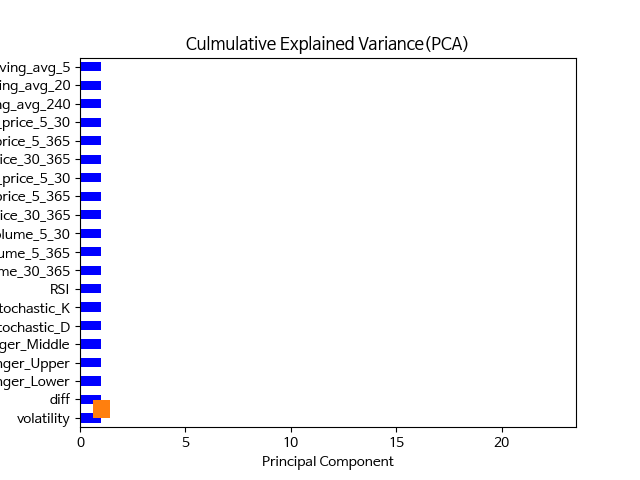

Cumulative Explained Variance:
[0.98426572 0.99512599 0.99999996 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [ ]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Evaluate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

In [ ]:
print(len(cumulative_explained_variance),len(dataList[0].columns))

22 22


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
# 시리즈로 만들어 인덱스를 붙인다
ser3 = pd.Series(cumulative_explained_variance, index=dataList[0].columns)

# 내림차순 정렬을 이용한다
top20_3 = ser3.sort_values(ascending=False)[:20]
print(top20_3)
pd.Series(top20_3).plot(kind='barh',color='blue',title='Culmulative Explained Variance(PCA)')

volatility                 1.0
diff                       1.0
Bollinger_Lower            1.0
Bollinger_Upper            1.0
Bollinger_Middle           1.0
Stochastic_D               1.0
Stochastic_K               1.0
RSI                        1.0
ratio_std_volume_30_365    1.0
ratio_std_volume_5_365     1.0
ratio_std_volume_5_30      1.0
ratio_std_price_30_365     1.0
ratio_std_price_5_365      1.0
ratio_std_price_5_30       1.0
ratio_avg_price_30_365     1.0
ratio_avg_price_5_365      1.0
ratio_avg_price_5_30       1.0
moving_avg_240             1.0
moving_avg_20              1.0
moving_avg_5               1.0
dtype: float64


<Axes: title={'center': 'Culmulative Explained Variance(PCA)'}, ylabel='Explained Variance Ratio'>

Close                      0.984266
Ret                        0.995126
moving_avg_5               1.000000
moving_avg_20              1.000000
moving_avg_240             1.000000
ratio_avg_price_5_30       1.000000
ratio_avg_price_5_365      1.000000
ratio_avg_price_30_365     1.000000
ratio_std_price_5_30       1.000000
ratio_std_price_5_365      1.000000
ratio_std_price_30_365     1.000000
ratio_std_volume_5_30      1.000000
ratio_std_volume_5_365     1.000000
ratio_std_volume_30_365    1.000000
RSI                        1.000000
Stochastic_K               1.000000
Stochastic_D               1.000000
Bollinger_Middle           1.000000
Bollinger_Upper            1.000000
Bollinger_Lower            1.000000
dtype: float64


<Axes: title={'center': 'Culmulative Explained Variance(PCA)'}>

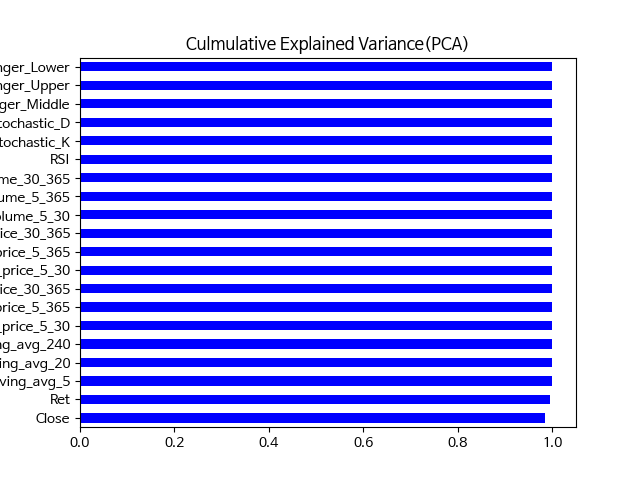

In [ ]:
# 오름차순은?
top20_4 = ser3.sort_values(ascending=True)[:20]
print(top20_4)
pd.Series(top20_4).plot(kind='barh',color='blue',title='Culmulative Explained Variance(PCA)')
